<a href="https://colab.research.google.com/github/asmasw6/Data-Science/blob/main/Real_Estate_Price_Trend_Analysis_by_Region_and_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!python -m pip install arabic_reshaper
!python -m pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 19.3 MB/s eta 0:00:00


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing,

import matplotlib.pyplot as plt
import seaborn as sns

from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display



In [6]:


df = pd.read_excel('/content/RealestateSale.xlsx')
df.head()

,المنطقة,المدينة,المدينة / الحي,الرقم المرجعي للصفقة,تاريخ الصفقة ميلادي,تاريخ الصفقة هجري,تصنيف العقار,نوع العقار,عدد العقارات,السعر,المساحة
0,منطقة الرياض,الافلاج,الافلاج/ الملك عبدالله,20289286,2023/07/01,1444/12/13,سكني,قطعة أرض,1,53000.0,660.00
1,منطقة الرياض,الرياض,الرياض/عريض,20289169,2023/07/01,1444/12/13,سكني,قطعة أرض,1,300000.0,450.00
2,منطقة الرياض,الرياض,الرياض/نمار,20289165,2023/07/01,1444/12/13,سكني,قطعة أرض,1,430000.0,300.00
3,منطقة المدينة المنوره,الصويدره,الصويدره/أخرى,20289168,2023/07/01,1444/12/13,سكني,قطعة أرض,1,73000.0,642.06
4,منطقة حائل,الشنان,الشنان/أخرى,20289133,2023/07/01,1444/12/13,سكني,قطعة أرض,1,50000.0,1050.00


In [7]:
def fix_arabic_text(text):
    return get_display(arabic_reshaper.reshape(text))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48545 entries, 0 to 48544
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   المنطقة               48545 non-null  object 
 1   المدينة               48545 non-null  object 
 2   المدينة / الحي        48545 non-null  object 
 3   الرقم المرجعي للصفقة  48545 non-null  int64  
 4   تاريخ الصفقة ميلادي   48545 non-null  object 
 5   تاريخ الصفقة هجري     48545 non-null  object 
 6   تصنيف العقار          48545 non-null  object 
 7   نوع العقار            48545 non-null  object 
 8   عدد العقارات          48545 non-null  int64  
 9   السعر                 48545 non-null  float64
 10  المساحة               48545 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.1+ MB


In [9]:
df.describe()

,الرقم المرجعي للصفقة,عدد العقارات,السعر,المساحة
count,4.854500e+04,48545.000000,4.854500e+04,4.854500e+04
mean,2.068906e+07,1.033577,1.119574e+06,5.015474e+03
std,2.298364e+05,0.520415,1.435911e+07,7.048508e+04
min,1.929019e+07,1.000000,5.000000e+03,0.000000e+00
25%,2.048906e+07,1.000000,1.209000e+05,3.000000e+02
50%,2.068676e+07,1.000000,3.833330e+05,4.874100e+02
75%,2.090987e+07,1.000000,8.000000e+05,6.900000e+02
max,2.110378e+07,28.000000,1.521462e+09,4.100323e+06


In [10]:
df['الرقم المرجعي للصفقة'].duplicated().sum()

np.int64(0)

In [11]:
df[df.duplicated()== True]


,المنطقة,المدينة,المدينة / الحي,الرقم المرجعي للصفقة,تاريخ الصفقة ميلادي,تاريخ الصفقة هجري,تصنيف العقار,نوع العقار,عدد العقارات,السعر,المساحة


In [12]:
df['عدد العقارات'].unique()

array([ 1,  6,  4,  2, 18, 12,  8, 28, 20,  5,  3, 14, 10, 15, 11, 16,  7,
       17, 27, 13])

In [13]:
df['المنطقة'].unique()

array(['منطقة الرياض', 'منطقة المدينة المنوره', 'منطقة حائل',
       'منطقة جازان', 'منطقة الحدود الشمالية', 'منطقة الجوف',
       'منطقة مكة المكرمه', 'منطقة نجران', 'منطقة عسير', 'منطقة القصيم',
       'منطقة الشرقية', 'منطقة تبوك', 'منطقة الباحة'], dtype=object)

In [14]:
df['المدينة'].unique()

array(['الافلاج', 'الرياض', 'الصويدره', 'الشنان', 'صبياء', 'الدائر',
       'عرعر', 'سكاكا', 'مكة المكرمة', 'القنفذه', 'وادي الفرع', 'شروره',
       'الطائف', 'محايل عسير', 'الدلم', 'عقلة الصقور', 'مرات', 'الدمام',
       'عفيف', 'جده', 'النعيريه', 'الهفوف', 'بريده', 'تثليت', 'يدمه',
       'حبونا', 'خميس مشيط', 'الشملى', 'الحائط', 'الروضة', 'ثادق',
       'المدينة المنورة', 'حريملاء', 'نجران', 'الاحساء', 'تبوك', 'الحريق',
       'حفر الباطن', 'حائل', 'فرسان', 'رياض الخبراء', 'بقعاء', 'الرين',
       'خليص', 'الدوادمي', 'ابو عريش', 'الزلفي', 'ضرماء', 'البدائع',
       'الخفجي', 'الرس', 'المجمعه', 'شقراء', 'الخبر', 'الخرج', 'جيزان',
       'ابها', 'احد رفيده', 'الخبراء', 'الشماسيه', 'ابقيق', 'دومة الجندل',
       'طريب', 'العقيق', 'البشائر', 'احد المسارحه', 'القويعيه',
       'البكيريه', 'سراة عبيده', 'الجبيل', 'القطيف', 'عنيزه', 'الغاط',
       'رأس تنوره', 'العيون', 'الاسياح', 'رجال المع', 'رنيه', 'الباحه',
       'الارطاويه', 'بحره', 'رابغ', 'السليمي', 'بيشه', 'طريف', 'الجفر',
      

In [15]:
df['نوع العقار'].unique()

array(['قطعة أرض', 'شقة', 'بيت', 'أرض زراعية', 'معرض/محل', 'فيلا', 'مرفق',
       'عمارة', 'مركز تجاري', 'إستراحة'], dtype=object)

In [16]:
df['تصنيف العقار'].unique()

array(['سكني', 'تجاري', 'زراعي', 'أخرى'], dtype=object)

# **تحليل حركة الأسعار حسب المنطقة والمدينة**


1.   تحليل الأسعار حسب المنطقة
2.   تحليل الأسعار حسب المدينة
3. رسم متوسط السعر حسب المنطقة
4. رسم متوسط السعر حسب المدينة (أفضل 10 مدن)
5. تحليل حركة الأسعار عبر الزمن (شهري)
6. رسم حركة الأسعار لمنطقة معينة



In [17]:
df['تاريخ الصفقة ميلادي'] = pd.to_datetime(df['تاريخ الصفقة ميلادي'])


### 1. تحليل الأسعار حسب المنطقة

In [18]:
region_price = (
    df.groupby('المنطقة')['السعر']
    .agg(
        avg_price='mean',
        median_price='median',
        transactions_count='count'
    )
    .sort_values(by='avg_price', ascending=False)
)

region_price.head()

,avg_price,median_price,transactions_count
المنطقة,,,
منطقة الشرقية,1.559567e+06,500000.0,6365
منطقة مكة المكرمه,1.534213e+06,550000.0,9557
منطقة الرياض,1.366714e+06,450000.0,17723
منطقة المدينة المنوره,6.777858e+05,406250.0,1842
منطقة تبوك,4.575583e+05,385685.0,810


### 2. تحليل الأسعار حسب المدينة

In [19]:
city_price = (
    df.groupby('المدينة')['السعر']
    .agg(
        avg_price='mean',
        median_price='median',
        transactions_count='count'
    )
    .sort_values(by='avg_price', ascending=False)
)

city_price.head()


,avg_price,median_price,transactions_count
المدينة,,,
الخبر,6.547237e+06,800000.00,824
الدرعيه,5.667186e+06,2500000.00,115
جده,2.009127e+06,646982.00,6082
الرياض,1.640525e+06,600000.00,13579
الدمام,1.514764e+06,894746.85,1806


### 3. رسم متوسط السعر حسب المنطقة

In [20]:


plot_df = region_price.reset_index()
plot_df['المنطقة'] = plot_df['المنطقة'].apply(fix_arabic_text)


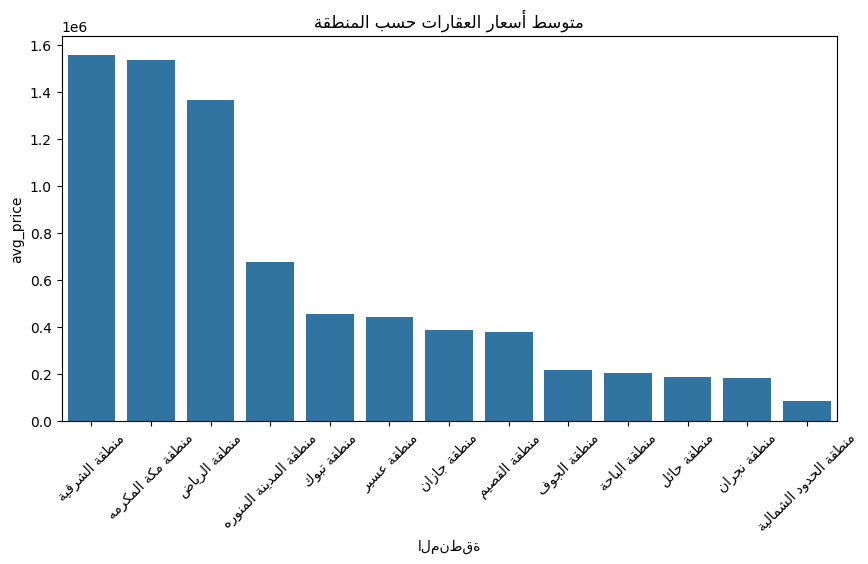

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=plot_df,
    x='المنطقة',
    y='avg_price'
)
plt.xticks(rotation=45)
plt.title(fix_arabic_text('متوسط أسعار العقارات حسب المنطقة'))
plt.show()


### 4. رسم متوسط السعر حسب المدينة (أفضل 10 مدن)

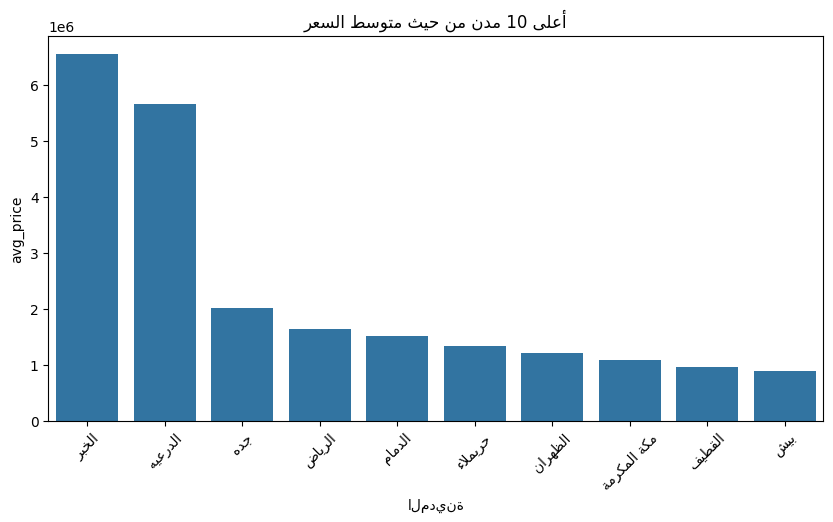

In [32]:
top_cities = city_price.head(10).reset_index()
top_cities['المدينة'] = top_cities['المدينة'].apply(fix_arabic_text)


plt.figure(figsize=(10,5))
sns.barplot(
    data=top_cities,
    x='المدينة',
    y='avg_price'
)
plt.xticks(rotation=45)
plt.title(fix_arabic_text('أعلى 10 مدن من حيث متوسط السعر'))
plt.show()


### 5. تحليل حركة الأسعار شهريًا

In [33]:
df['month'] = df['تاريخ الصفقة ميلادي'].dt.to_period('M')

price_trend = (
    df.groupby(['month', 'المنطقة'])['السعر']
    .mean()
    .reset_index()
)

price_trend['month'] = price_trend['month'].astype(str)
price_trend.head()


,month,المنطقة,السعر
0,2023-07,منطقة الباحة,2.214755e+05
1,2023-07,منطقة الجوف,2.053056e+05
2,2023-07,منطقة الحدود الشمالية,9.195751e+04
3,2023-07,منطقة الرياض,1.694841e+06
4,2023-07,منطقة الشرقية,1.663791e+06


### 6. رسم حركة الأسعار لمنطقة معينة

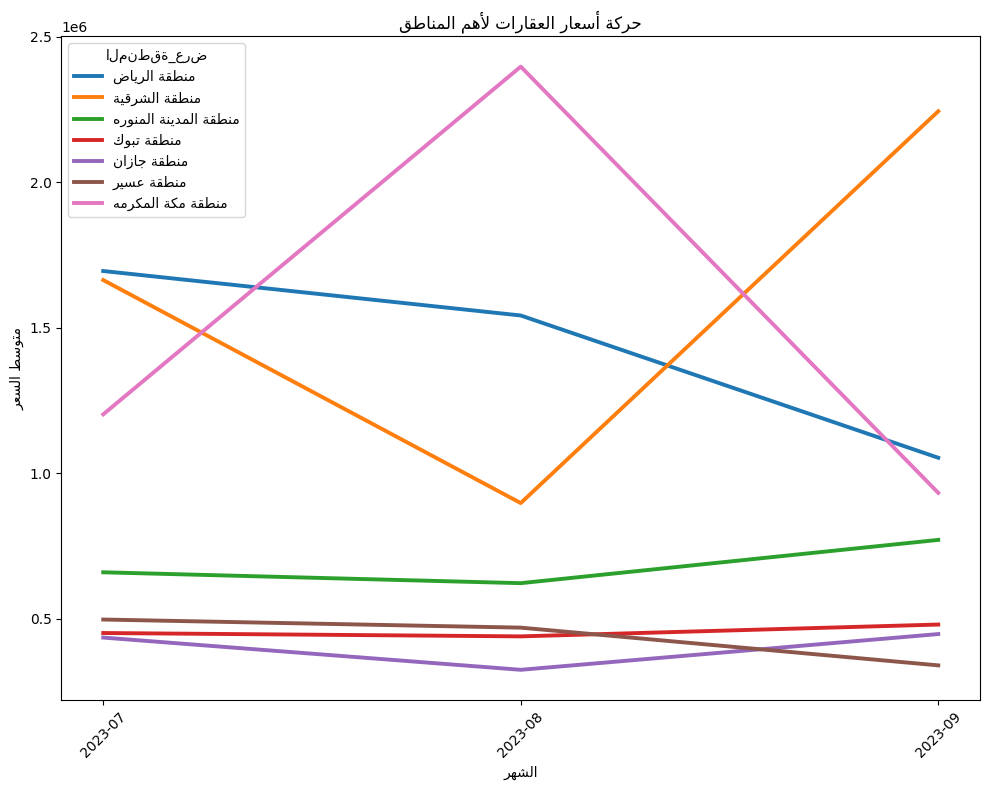

In [47]:
df['تاريخ الصفقة ميلادي'] = pd.to_datetime(df['تاريخ الصفقة ميلادي'])
df['month'] = df['تاريخ الصفقة ميلادي'].dt.to_period('M').astype(str)

top_regions = (
    df.groupby('المنطقة')['السعر']
    .mean()
    .sort_values(ascending=False)
    .head(7)
    .index
)


price_trend_top = (
    df[df['المنطقة'].isin(top_regions)]
    .groupby(['month', 'المنطقة'])['السعر']
    .mean()
    .reset_index()
)

price_trend_top['المنطقة_عرض'] = price_trend_top['المنطقة'].apply(fix_arabic_text)


plt.figure(figsize=(10,8))

sns.lineplot(
    data=price_trend_top,
    x='month',
    y='السعر',
     hue='المنطقة_عرض',
    linewidth=2.8,
)


plt.xticks(rotation=45)
plt.xlabel(fix_arabic_text('الشهر'))
plt.ylabel(fix_arabic_text('متوسط السعر'))
plt.title(fix_arabic_text('حركة أسعار العقارات لأهم المناطق'))
plt.tight_layout()
plt.show()
